# **Individual Planning DSCI 100 Project**

# 1: Data Description

### Data Collection Method:
- The data of both datasets were collected by the UBC research group, Pacific Laboratory for Artificial Intelligence through recording player behaviour in MineCraft. (https://plaicraft.ai/)

### players.csv:
- The players dataframe has 196 observations, with 7 variables

| Variable | Description | Data type |
|----------|-------------|-----------|
| experience | Self-identifying Level of Experience | chr|
| subscribe  | Game Newsletter Subscription Status | lgl |
| hashedEmail | Hashed Version of Player Email | chr |
| played_hours | Hours spent in game | dbl |
| name | Name of player | chr |
| gender | Gender of player | chr |
| age | Age of player | dbl |

### summary statistics
- From the `summary()` function:

| Variable | Min | Max | Mean |
|----------|-----|-----|------|
| played_hours | 0.00 | 223.10 | 5.85|
|age | 9.00 | 58.00 | 21.14 |


In [5]:
library(tidyverse)

player_data <- read_csv("data/players.csv") 
sessions_data <- read_csv("data/sessions.csv")

player_pro <- player_data |>
    filter(experience == "Pro")|>
    nrow()

player_veteran <- player_data |>
    filter(experience == "Veteran") |>
    nrow()

player_amateur <- player_data |>
    filter(experience == "Amateur")|>
    nrow()

player_regular <- player_data |>
    filter(experience == "Regular")|>
    nrow()

player_beginner <- player_data |>
    filter(experience == "Beginner")|>
    nrow()

player_rows <- nrow(player_data)

beginner_pc <- round((player_beginner/player_rows), 2)
amateur_pc <- round((player_amateur/player_rows), 2)
regular_pc <- round((player_regular/player_rows), 2)
veteran_pc <- round((player_veteran/player_rows), 2)
pro_pc <- round((player_pro/player_rows), 2)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


The proportion of self-identifying experience is as follows:

- Beginner: 0.18
- Amateur: 0.32
- Regular: 0.18
- Veteran: 0.24
- Pro: 0.07

In [6]:
true_players <- player_data |>
    filter(subscribe == TRUE) |>
    nrow()

false_players <- player_data |>
    filter(subscribe == FALSE) |>
    nrow()

true_pc <- round((true_players/player_rows), 2)
false_pc <- round((false_players/player_rows), 2)

The proportion of players subscribed to the game newsletter is as follows:
- True: 0.73
- False: 0.27

### sessions.csv
- The sessions dataframe has 1535 observations, with 5 observations

| Variable | Description | Data type |
|----------|-------------|-----------|
| hashedEmail | Hashed Version of Player Email | chr |
| start_time | Start Time of Session | chr|
| end_time | End Time of Session | chr |
| original_start_time | Start Time Represented in UNIX time | dbl |
| original_end_time | End Time Represented in UNIX time | dbl |

### summary statistics
- From the `summary()` function:

| Variable | Min | Max | Mean |
|----------|-----|-----|------|
| original_start | 1.71e+12 | 1.73e+12 | 1.72e+12 |
| orginal_end_time | 1.71e+12 |1.73e+12 | 1.72e+12 |

## Issues
- Data is given in 2 separate .csv files, making the data difficult to interpret between the files. This can be solved through merging the datasets into one through their mutual variable (hashedEmail), using `inner_join`
- In the `players.csv` dataframe, experience can be changed to fct data types. Age can also be changed to an int data type.
- `start_time` and `end_time` in `sessions.csv` is not tidy, there are 2 observations in the cells

# 2: Questions
**Broad question:** What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

**Specific question:** Can the status of subscribing to a game-related newsletter be predicted from Age and played_hours?

The data can help answer this specific question by providing information on the user's demographics and whether they are subscribed. By observing who is subscribed, we can predict a user's subscribing status based on their characteristics. The data type of subscribing can be changed to an fct type, and knn-neighbors can be used to classify status. The data will need to be standardized, due to the scale differences in age and played hours.

# 3: Exploratory Data Analysis + Visualization
Using the tidyverse package, the datasets can be loaded into R with `read_csv`.

In [7]:
library(tidyverse)

player_data <- read_csv("data/players.csv") 
sessions_data <- read_csv("data/sessions.csv")

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Because the question only uses variables from one dataframe, we will be making changes to the `players.csv` dataframe.

In [8]:
head(player_data)

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


Changing subscription and experience to factor types:

In [9]:
new_player_data <- player_data |>
    mutate(subscribe = as.factor(subscribe)) |>
    mutate(experience = as.factor(experience))
head(new_player_data)

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<fct>,<fct>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


From the `summary()` function:

| Variable | Mean |
|----------|------|
| played_hours | 5.85 |
| Age | 21.14 |

From researching, the `cut` function can be used to bin Age to create a colour coordinated graph. (https://stackoverflow.com/questions/5570293/create-binned-values-of-a-numeric-column)

In [11]:
new_player_data$age_ranges <- cut(new_player_data$Age, breaks=c(0,10,20,30,100), labels=c("0-10","11-20","21-30", "30+"))

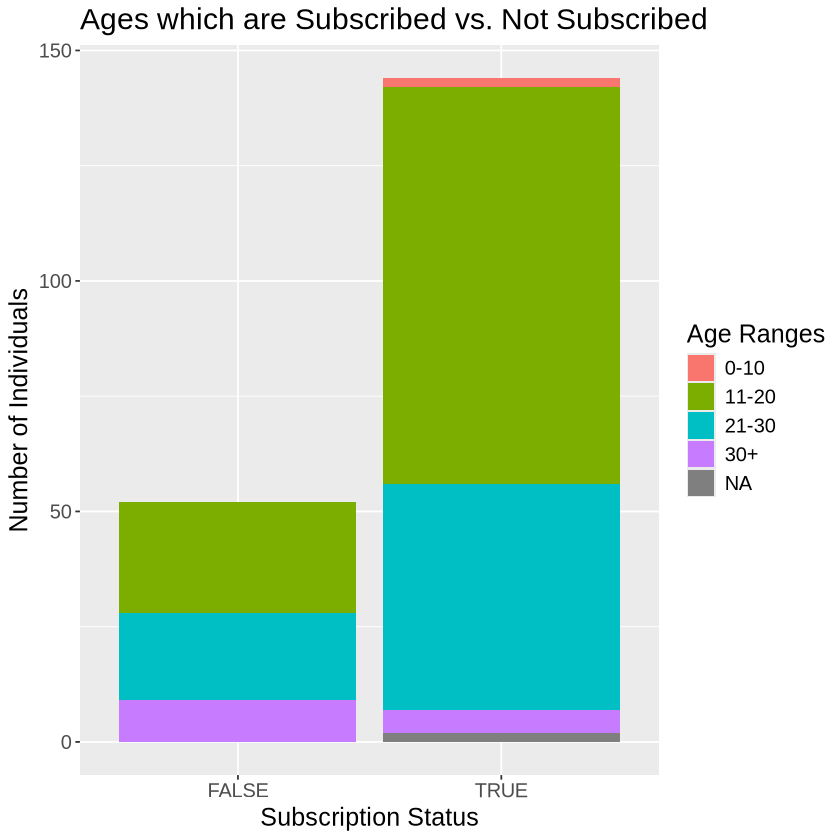

In [12]:
age_plot <- new_player_data |>
    ggplot(aes(x = subscribe, fill = age_ranges)) +
    geom_bar() +
    labs(x = "Subscription Status", 
         y = "Number of Individuals", 
         fill = "Age Ranges",
         title = "Ages which are Subscribed vs. Not Subscribed") +
    theme(text = element_text(size = 15))
age_plot

From this plot, we can see the proportion of individuals which are subscribed vs. not subscribed based on their age range. There is a greater count in individuals in the 11-30 age range subscribing, while there are less individuals in the 30+ age range subscribed.

A similar process can be done for `played_hours`.

In [13]:
new_player_data$hours_ranges <- cut(new_player_data$played_hours, breaks=c(-1,20,50,100,200,250), labels=c("0-20","20-50","50-100", "100-200", "200+"), na.rm = TRUE)

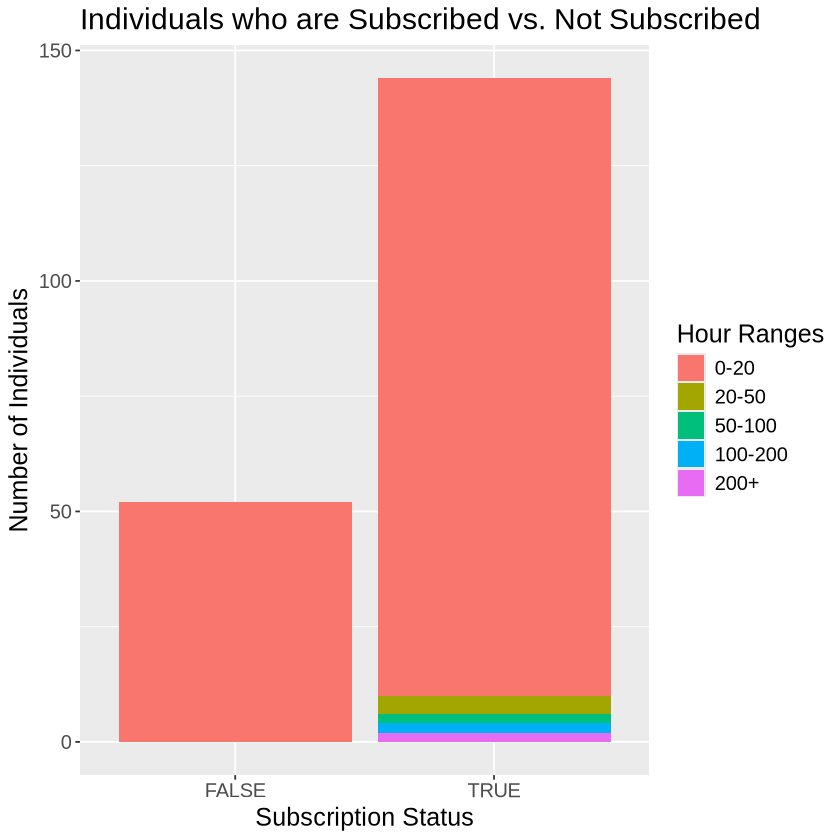

In [14]:
phours_plot <- new_player_data |>
    ggplot(aes(x = subscribe, fill = hours_ranges)) +
    geom_bar() +
    labs(x = "Subscription Status", 
         y = "Number of Individuals", 
         fill = "Hour Ranges",
         title = "Individuals who are Subscribed vs. Not Subscribed") +
    theme(text = element_text(size = 15))
phours_plot

Through this plot, we can see individuals who do not play regularly are not subscribed to the game newsletter. This is because the entire false bar is red (meaning they've played 0-20 hours), while the true bar is a mix of colours. 

# 4: Methods and Plan

### Method is classification K-nearest neighbours, with the players.csv dataframe:
- `players.csv` has more information on the player’s demographics
- Classification is used because we are predicting categorical factor, not numerical
- Method is appropriate because using existing patterns of subscribed or not, we can predict if future users will be subscribed by comparing it to the existing data.

### Limitations:
- Because there is an imbalance in the classes, it may perform poorly

### Data processing:
- Predictors will be scaled and centered
- The data will be split into 70/30 proportion of training and testing to judge the accuracy of the model at the end
- To find the best K value, standard 5-fold cross validation can be used on the training data
- The model will then be used on the testing data to judge how well the model works with unseen data with `metrics()`